In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# **Project Proposal for DSCI 100: Predicting Usage of a Video Game Research Server**

UBC PLAI Lab's research project, plaicraft.ai, aims to use AI (Artificial Intelligence) to train AGI(Artificial General Intelligence)-like agents that responds sensibly in video and audio perceptual environments in minecraft. A free, cloud and browser based minecraft game was created for the purpose of collecting minecraft gameplay from real players. However, numerous amount of data will be needed, which the research states that they aim to collect over 10,000 hours of multiplayer minecraft gameplay. Before expanding to a wider player base, the researchers will want to know certain characteristics of players who will be playing lots of minecraft, when they usually play, and predict the likelihood of players' continued play, to aid in their targeted recruitment efforts and resource management for the project accordingly. We are provided with two initial datasets about the players and each individual sessions for analysis.

## **Data Description:**
- Two different data set files were provided for analysis, players.csv and sessions.csv
- descriptions for each .csv files below

### **players.csv**
- This table captures the characteristics of each player by the 9 variables below
- There are 196 observations (rows) in total, each with a unique hashedEmail value and combination of other variables.
- There are 9 different variables (columns), each variable description described below: <br>
| Variable | Vector Type | Description | Potentital Issues |
| :---: | :---: | --- | --- |
| **experience** | character | user rank their own experience in minecraft, 5 unique values: Beginner, Amateur, Regular, Veteran, Pro | User ranks themselves, each person could be biased in their ranking |
| **subscribe** | logical | if the user subscribed to PlaiCraft's email updates |
| **hashedEmail** | character | unique email identifier given to player as they signed up to play in PlaiCraft |
| **played_hours** | double | total hours the individual played |
| **name** | character | name given by PlaiCraft to the player when they signed up, each person has a unique name |
| **gender** | character | user chosen preferred gender, includes 7 unique values: Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other | user chosen gender, some may lie about their gender
| **age** | double | user chosen age, ranges from 8 to 99 | User submitted age, some may lie about their age
| **individualId** | logical | possibly unique identifier given to individual, only contains N/A in this dataset, will drop this column as hashedEmail provided this information | no data for this variable
| **organizationName** | logical | possibly the organization the individual is associated with, only contains N/A in this dataset, will drop this column as no valuable information is contained to provide predictions | no data for this variable

In [2]:
players_df <- read_csv("data/players.csv")
head(players_df)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


In [3]:
select(players_df, individualId) |>
    unique()

individualId
<lgl>
NA


In [4]:
select(players_df, organizationName) |>
    unique()

organizationName
<lgl>
NA


In [5]:
select(players_df, experience) |>
    unique()

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


In [6]:
select(players_df, gender) |>
    unique()

gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


### **sessions.csv**
- This table captures each session started and ended by each player
- Important to note that this dataset only has 125 unique hashedEmail, indicating that only 125 players actually started a session out of 196 from player.csv
- There are 1535 observations (rows) in total, each with a unique combination of variables.
- There are 5 different variables (columns), each variable description described below: <br>
| Variable | Vector Type | Description |
| :---: | :---: | --- |
| **hashedEmail** | character | unique email identifier given to player as they signed up to play in PlaiCraft |
| **start_time** | character | start time of the session, with date/month/year hour:minute as value |
| **end_time** | character | end time of the session, with date/month/year hour:minute as value |
| **original_start_time** | double | scheduled start time (after player signed up) in UNIX timestamp format, representing the number of seconds since January 1, 1970 (UTC) |
| **original_end_time** | double | scheduled end time in UNIX timestamp format, representing the number of seconds since January 1, 1970 (UTC) |

In [7]:
sessions_df <- read_csv("data/sessions.csv")
head(sessions_df)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [8]:
select(sessions_df, hashedEmail) |>
    unique() |>
    count()

n
<int>
125


## **Question Proprosal**

To achieve 10,000 hours in total plaicraft playtime, we will want to take a look at which characteristics of players are most likely to contribute to playing more, so recruitment efforts can more accurately target these types of players. We will then use `played_hours` in the players.csv file as our response variable of interest and user indicated `experience`, `subscribe`, and `age` as explanatory variables. We exclude `individualID` and `organizationName` because there are no data in those variables. `hashedEmail` is excluded in the prediction as it act as an index to uniquely identify each row. We drop the `names` variable as it acts the same as `hashedEmail`, and provide no information for prediction as these names are automatically given by the PlaiCraft system. We also dropped `gender` to avoid discrimination against people with different genders in our recruitment efforts. Since we are looking for characteristics for recruitment, the people we recruit probably never played PlaiCraft before, thus variables in sessions.csv file will also be excluded as the information within this file are from players who played for at least one session. <br>
One thing to take note is that there are 71 players (36% of total) who's played_hours are 0 because they signed up but never started a session, we will have to take a look at the effects of including and excluding these players to our prediction model.

## **Exploratory Data Analysis and Visualization**

In [9]:
players_proj <- select(players_df, hashedEmail, experience, subscribe, age, played_hours)
head(players_proj)

hashedEmail,experience,subscribe,age,played_hours
<chr>,<chr>,<lgl>,<dbl>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Pro,TRUE,9,30.3
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Veteran,TRUE,17,3.8
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Veteran,FALSE,17,0.0
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,Amateur,TRUE,21,0.7
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,Regular,TRUE,21,0.1
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,Amateur,TRUE,17,0.0


Note: hashedEmail included to act as identifier for each unique row (do not pass into fit); played_hours at the end as response variable <br>
As stated before, there are no missing values for all the variables

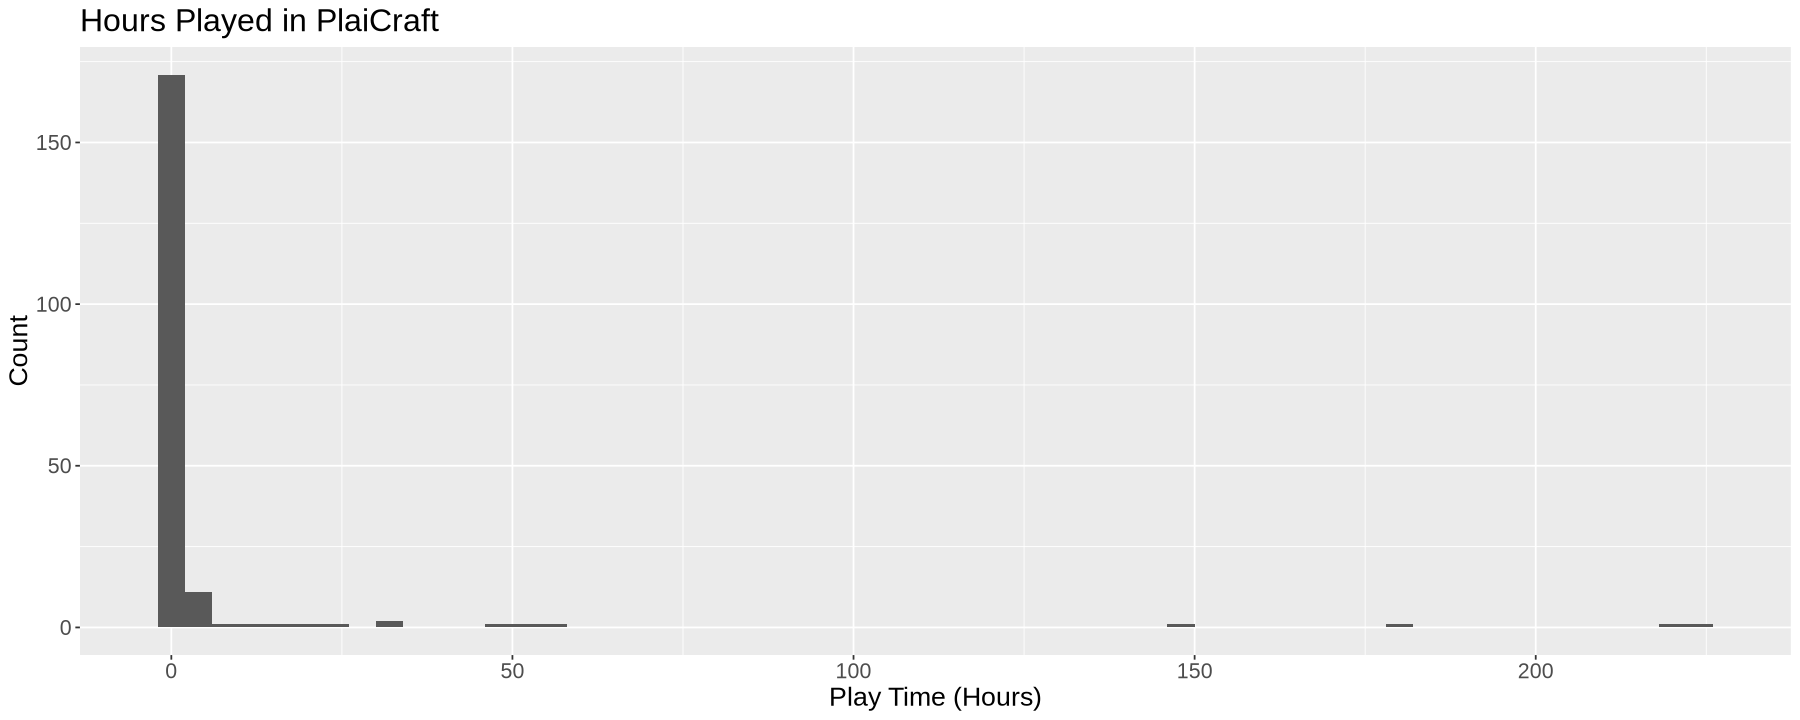

In [10]:
options(repr.plot.width = 15, repr.plot.height = 6) 
played_hours_plot <- ggplot(players_proj, aes(x = played_hours)) +
                        geom_histogram(binwidth = 4) +
                        labs(x = "Play Time (Hours)",
                             y = "Count",
                             fill = "experience",
                             title = "Hours Played in PlaiCraft") +
                        theme(text = element_text(size = 16))
played_hours_plot

More than 170 people played close to 0 hours, highest are over 200 hours.

Warning message:
“Removed 25 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


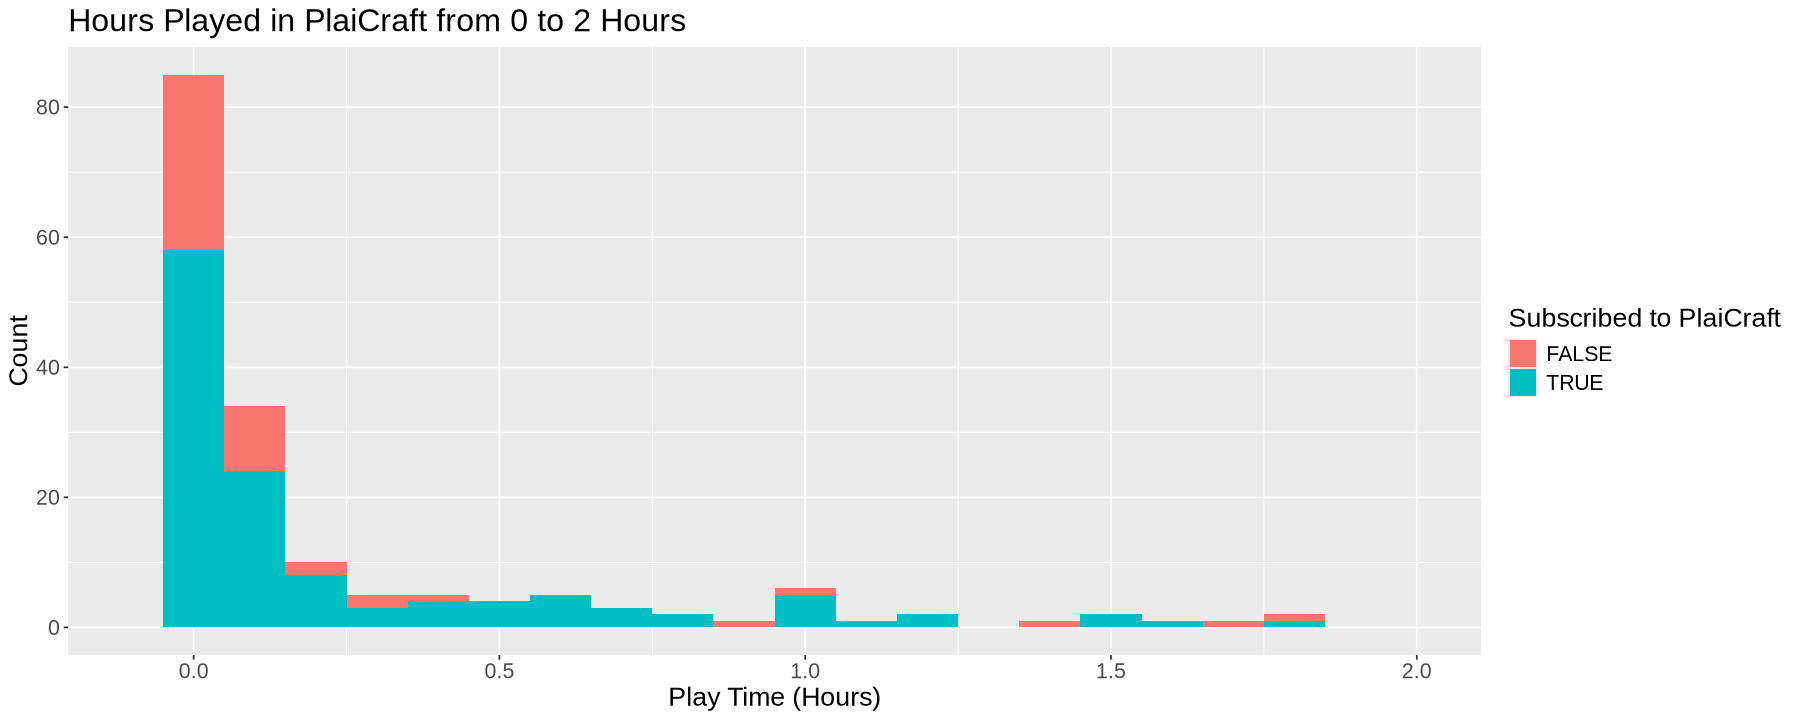

In [11]:
played_hours_plot_zoom_sub <- ggplot(players_proj, aes(x = played_hours, fill = as.factor(subscribe))) +
                                geom_histogram(binwidth = 0.1) +
                                labs(x = "Play Time (Hours)",
                                     y = "Count",
                                     title = "Hours Played in PlaiCraft from 0 to 2 Hours",
                                     fill = "Subscribed to PlaiCraft") +
                                     xlim(-0.1,2) +
                                theme(text = element_text(size = 16))
played_hours_plot_zoom_sub

Zooming into play time count from 0 to 2 hours, we can see that over 80 people have contributed 0 or near 0 hours, and as stated before, 76 people contributed 0 hours have not started a session. <br>
People who are not subscribed to PlaiCraft have mostly contributed less, although there are some people who contributed almost 2 hours who are not subscribed.

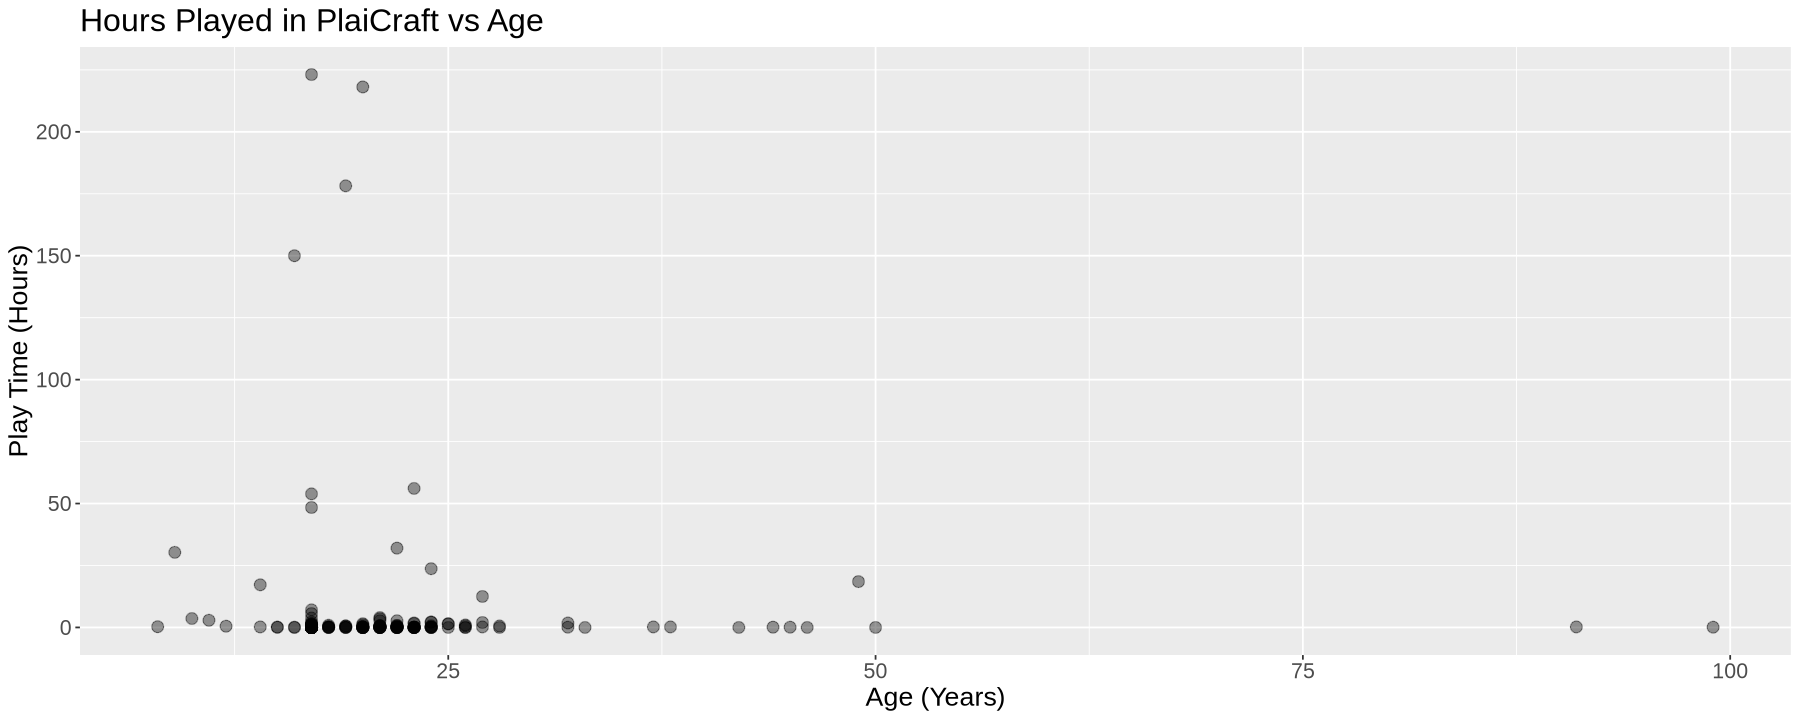

In [12]:
played_hours_plot <- ggplot(players_proj, aes(x = age, y = played_hours)) +
                        geom_point(alpha = 0.4, size = 3) +
                        labs(y = "Play Time (Hours)",
                             x = "Age (Years)",
                             title = "Hours Played in PlaiCraft vs Age") +
                        theme(text = element_text(size = 16))
played_hours_plot

Note: People who play long hours over 150 are under 25 years old, there is no clear trend for age vs play time.

Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”


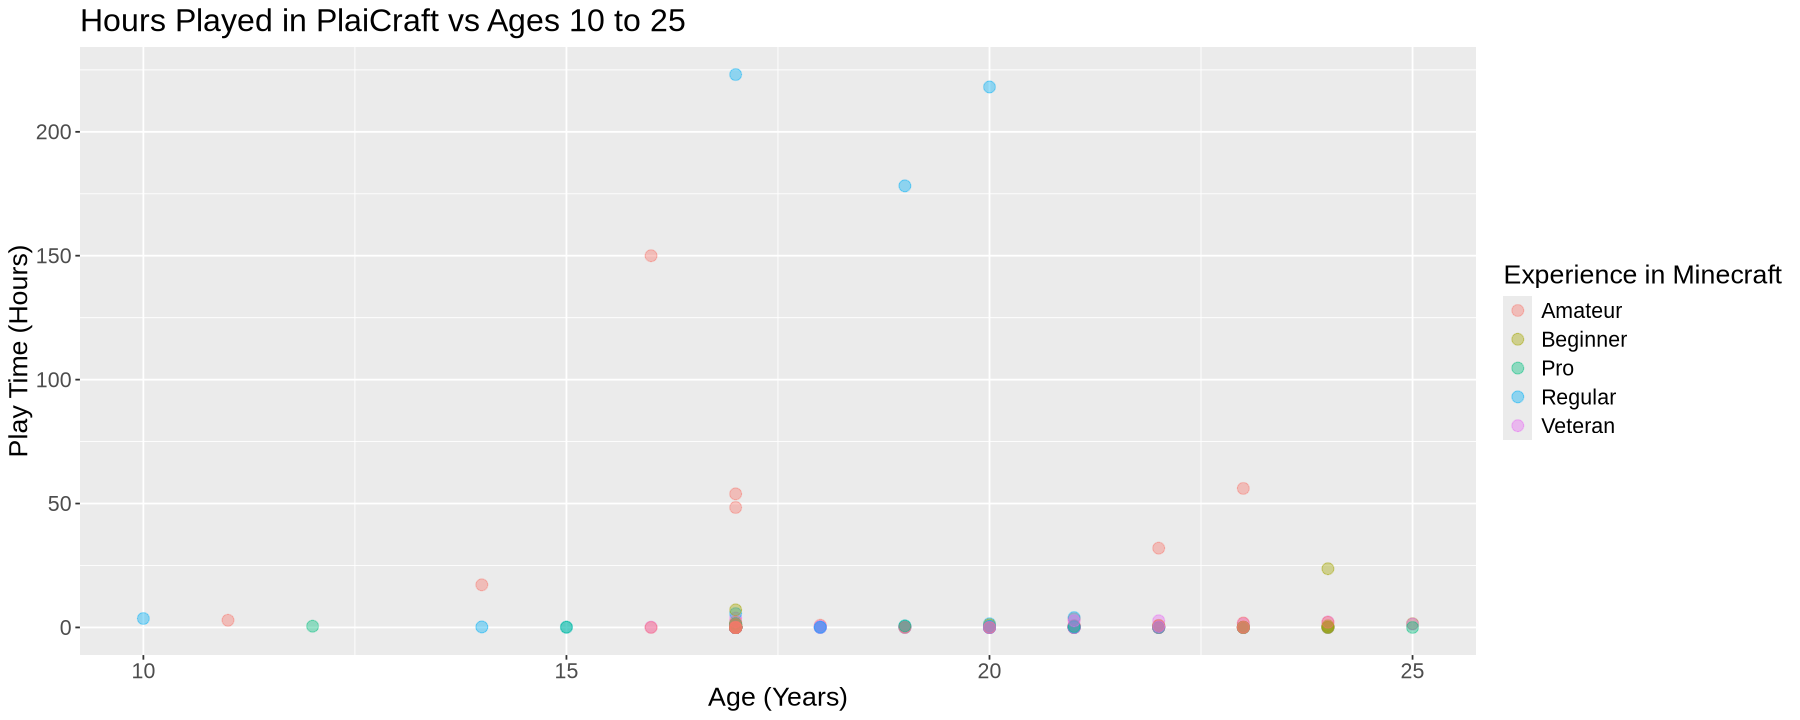

In [13]:
played_hours_plot_exp <- ggplot(players_proj, aes(x = age, y = played_hours, colour = as.factor(experience))) +
                        geom_point(alpha = 0.4, size = 3) +
                        labs(y = "Play Time (Hours)",
                             x = "Age (Years)",
                             title = "Hours Played in PlaiCraft vs Ages 10 to 25",
                             colour = "Experience in Minecraft") +
                        xlim(10,25) +
                        theme(text = element_text(size = 16))
played_hours_plot_exp

Note: Zooming into ages 10 to 25, we can clearly see that people with regular experience in minecraft are the ones who played for longest times, above 175 hours, between the ages 15 and 20, and people who are ameteurs also contributed in long hours of playtime, from 50 hours to 150 hours between the ages 15 to 25.

Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”


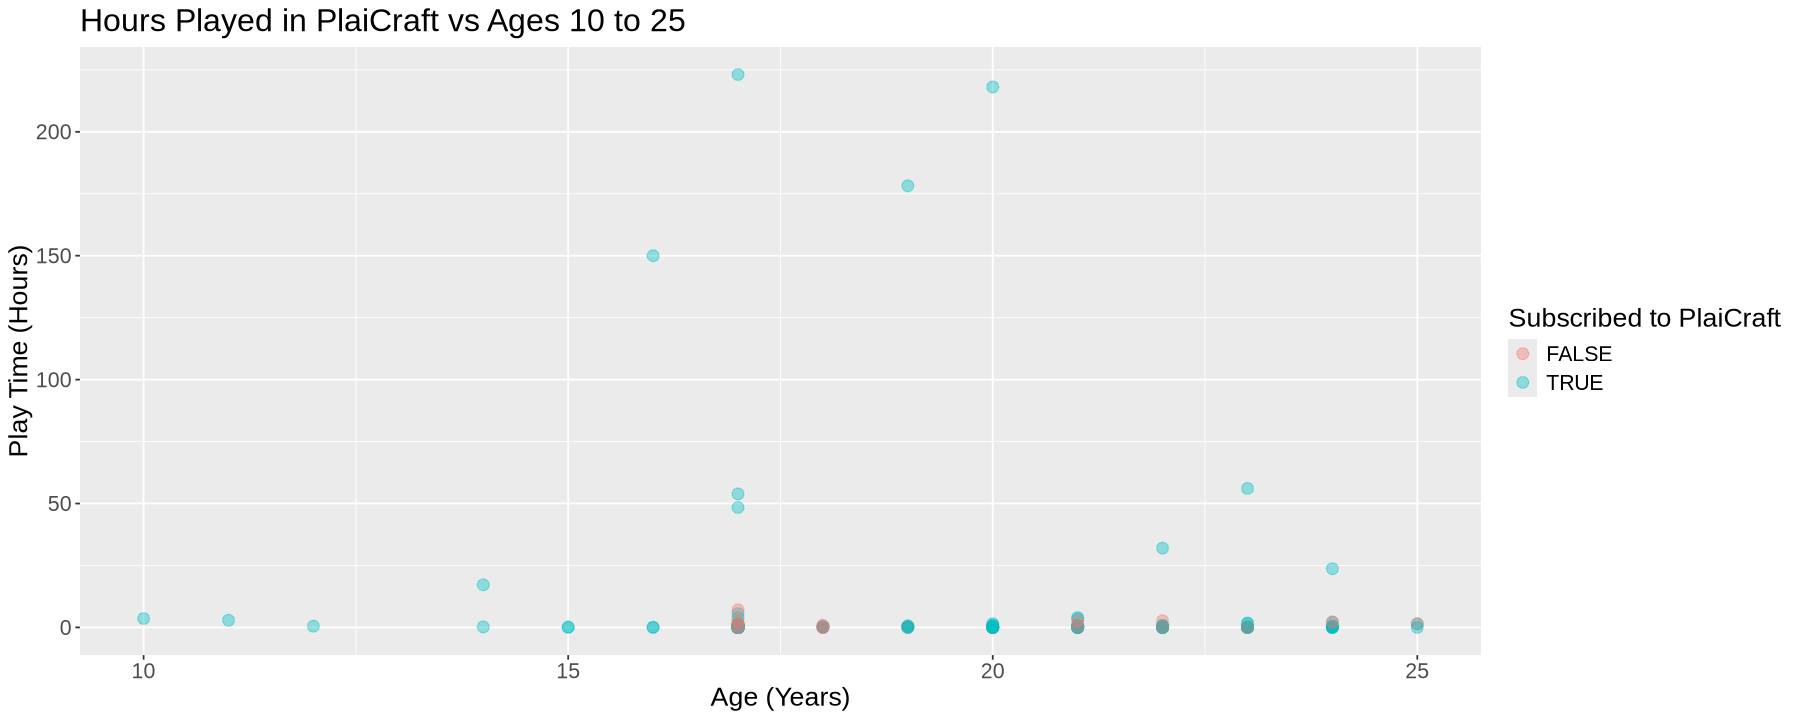

In [14]:
played_hours_plot_sub <- ggplot(players_proj, aes(x = age, y = played_hours, colour = as.factor(subscribe))) +
                            geom_point(alpha = 0.4, size = 3) +
                            labs(y = "Play Time (Hours)",
                                 x = "Age (Years)",
                                 title = "Hours Played in PlaiCraft vs Ages 10 to 25",
                                 colour = "Subscribed to PlaiCraft") +
                            xlim(10,25) +
                            theme(text = element_text(size = 16))
played_hours_plot_sub

Note: seems like most people who contributed playtime are subscribed, but many who don't contribute time are also subscribed.

## **Methods and Plan**

Since our response variable is play_hour, which is a numerical data, we will need to use a regression model to provide accurate prediciton. Since there are no clear trends from our explanatory variables with our response variable, KNN regression model would more likely to be able to accurately predict if a player will contribute long hours to the study. KNN regression model will not be able to accurately predict if a player will play for longer hours than our training data set provides, which is above 223 hours. Alternatively, since we want to find the likelihood of a player contributing lots of hours to the project, we can also use a treshold of play hours as above being positive and below being negative, which in this case we can use a classification model to predict if a player is going to contribute above the threshold hours or not. Either case, since we don't have lots of data, we will use a 80-20 split for our train-test data. The training data will then have its best k value chosen by using cross validation at standard 5 folds, and the highest score k will be chosen as our best k value to further fit on to our test model. The fitted model will then be used to predict the test data set, which we will obtain the test score in the end. If the test score is sufficiently high, we will be able to use this model to predict future candidate's contribution to plaicraft.